In [1]:
import sys
sys.path.append("..")
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
from benchmarks.evaluator.oneshot import Evaluator
from benchmarks.evaluator.utils import plot_success_bars
from benchmarks.prompts.camb import get_prompts

In [3]:
df = get_prompts(reintial=False)

In [4]:
workdir = "../data/cmbagent_output/evals"

In [5]:
Ee4o = Evaluator(workdir,agent='engineer', model='gpt-4o', trials=10)
Ee41 = Evaluator(workdir,agent='engineer', model='gpt-4.1', trials=10)
Eeg = Evaluator(workdir,agent='engineer', model='gemini-2.5-pro-preview-03-25', trials=10)
Ecc = Evaluator(workdir,agent='camb_context', model='', trials=10)

In [6]:
Ee4o(df)
Ee41(df)
Eeg(df)
Ecc(df)

creating reference answers for prompts: 100%|██████████| 14/14 [00:00<00:00, 19831.22it/s]


In [7]:
#Eeg.run_all()


In [8]:
#results = E.run_all()

/Users/antoidicherianlonappan/Workspace/Benchmarks/examples/../benchmarks/evaluator/oneshot.py:232: FutureWarning: The 'special_case=True' option will be removed in a future version.
  result = self.success_prompt(idx, special_case=special_case)
/Users/antoidicherianlonappan/Workspace/Benchmarks/examples/../benchmarks/evaluator/oneshot.py:204: UserWarning: loadtxt: input contained no data: "../data/cmbagent_output/evals/prompt_engineergemini-2.5-pro-preview-03-25_2/trial_2/data/result.csv"
  x_llm, y_llm = np.loadtxt(resultfile, delimiter=',', skiprows=1).T
/Users/antoidicherianlonappan/Workspace/Benchmarks/examples/../benchmarks/evaluator/oneshot.py:204: UserWarning: loadtxt: input contained no data: "../data/cmbagent_output/evals/prompt_engineergemini-2.5-pro-preview-03-25_2/trial_3/data/result.csv"
  x_llm, y_llm = np.loadtxt(resultfile, delimiter=',', skiprows=1).T
/Users/antoidicherianlonappan/Workspace/Benchmarks/examples/../benchmarks/evaluator/oneshot.py:204: UserWarning: loadt

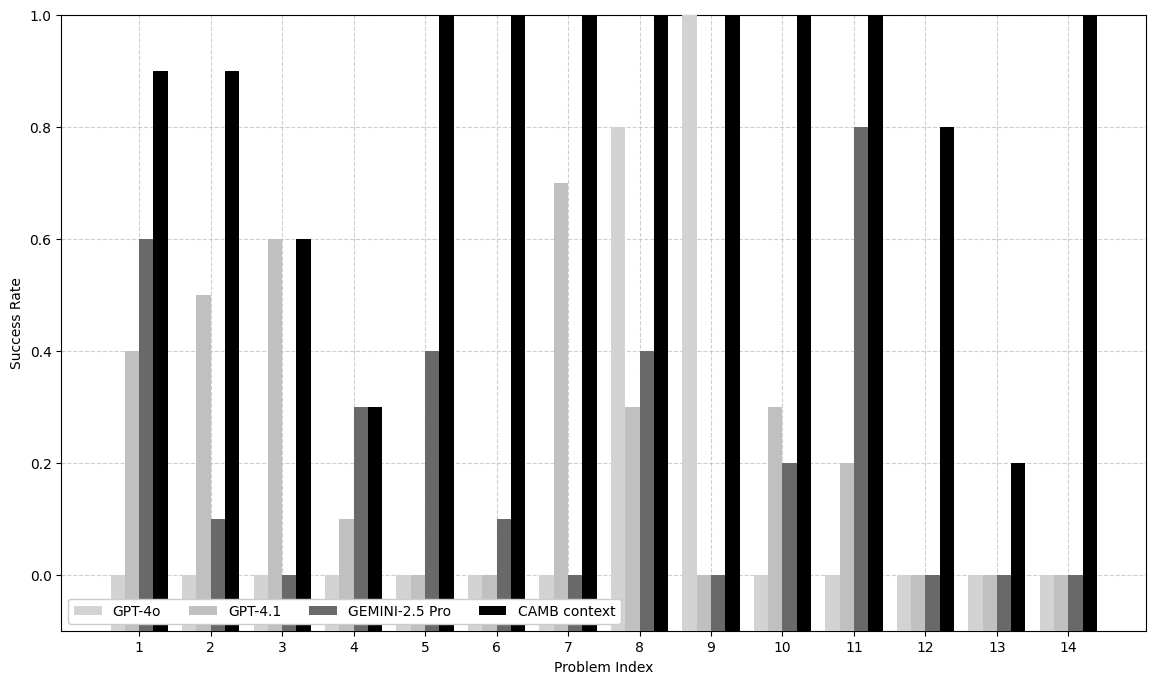

In [9]:
scores = [Ee4o.success_all(), Ee41.success_all(), Eeg.success_all(), Ecc.success_all()]
plot_success_bars(scores, ['GPT-4o', 'GPT-4.1', 'GEMINI-2.5 Pro', 'CAMB context'], ['lightgrey','silver','dimgrey','k'],width=0.2,figsize=(14,8),save='camb_success.pdf')